**In this notebook:** 
    
    - we compute the number of contacts by social group (2 SEP x 2 SES), for each age group

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import cm

import geopandas as gp 
from shapely.geometry import Point, LineString

import datetime as dt

import time

import scipy.stats as st

import seaborn as sns

import math

from matplotlib.colors import LinearSegmentedColormap

In [14]:
plt.rcParams['savefig.transparent']=False
plt.rcParams['savefig.facecolor']='white'

# subgroup analysis: SEP vs education level - all age groups

## contacts overall

### bootstrap

In [15]:
comix = pd.read_csv("./../data/processed/comixdata_part_cleaned+sep_munic+cont_overall.csv")

#comix['education_level3_v2'] = comix['education_level'].apply(lambda x: 
#                                        'Without post-compulsory education' if x == 'Obligatory school'
#                                         else ('Upper secondary level' 
#                                               if x in ['Gymnasium', 'Vocational education']
#                                                    else 'Tertiary level'))

comix.drop('education_level3', axis=1, inplace=True)
comix['education_level3'] = comix['education_level3_v3']

education_order = ['Tertiary level',
                   'Without tertiary education']
quartile_order = ['lowest', 'highest']
    
for h in [0]:
    
    for k in [2]:

        if h < len(comix['age_group_part'].unique()):
            age_class = comix['age_group_part'].unique()[h]
            cc = comix[comix['age_group_part']==age_class].copy()
        else:
            age_class = 'all age groups'
            cc = comix.copy()
            
        if k < len(comix['panel_wave'].unique()):
            wave = cc['panel_wave'].unique()[k]
            dd = cc[cc['panel_wave']==wave].copy()
        else:
            wave = 'all waves'
            dd = cc.copy()            

        df = dd[['education_level3','sep3_quartile','contacts_fill0_trunc50']].copy()
        
        # Convert 'education_level3' and 'sep3_quartile' to categorical type with custom order
        df['education_level3'] = pd.Categorical(df['education_level3'], 
                                                categories=education_order, ordered=True)
        df['sep3_quartile'] = pd.Categorical(df['sep3_quartile'], 
                                             categories=quartile_order, ordered=True)

In [16]:
from sklearn.utils import resample
import random

# Set a seed for reproducibility
random.seed(42)

# Assuming df is your DataFrame containing the columns 'education_level3', 'sep3_quartile', and 'contacts_fill0_trunc50'

# Define the number of bootstrap samples
n_bootstrap_samples = 1000

# Define a function to compute mean and confidence interval from bootstrapped samples
def bootstrap_mean_ci(data):
    # Bootstrap resampling
    bootstrapped_means = []
    for _ in range(n_bootstrap_samples):
        bootstrap_sample = resample(data, replace=True)
        bootstrapped_means.append(np.mean(bootstrap_sample))
    
    # Compute mean and confidence interval
    mean = np.mean(data)
    mean_bs = np.mean(bootstrapped_means)
    ci_up = np.quantile(bootstrapped_means, 0.975)
    ci_dw = np.quantile(bootstrapped_means, 0.025)
    
    return mean, mean_bs, ci_dw, ci_up

In [17]:
# Group by 'education_level3' and 'sep3_quartile' and compute mean and confidence interval for each group
result = df.groupby(['education_level3', 
                     'sep3_quartile'])['contacts_fill0_trunc50'].apply(bootstrap_mean_ci).reset_index()

# Extracting results into separate columns
result[['mean', 'mean_bs', 'ci_low', 'ci_high']] = pd.DataFrame(result['contacts_fill0_trunc50'].apply(lambda x: 
                                                    x if isinstance(x,float)==False else 
                                                    (np.nan, np.nan, np.nan, np.nan)).tolist())
# Dropping the original column
result.drop(columns=['contacts_fill0_trunc50'], inplace=True)

# Displaying the result
result

,education_level3,sep3_quartile,mean,mean_bs,ci_low,ci_high
0,Tertiary level,lowest,3.500000,3.505000,1.000000,6.000000
1,Tertiary level,highest,6.454545,6.374636,2.909091,10.818182
2,Without tertiary education,lowest,5.187500,5.203250,3.812500,6.687500
3,Without tertiary education,highest,12.054054,12.149568,7.378378,17.487162


In [18]:
def truncate_colormap(cmap, minval=0.2, maxval=0.8, n=100):
    """Truncate a colormap to a given range."""
    new_cmap = LinearSegmentedColormap.from_list(
        f"truncated({cmap.name},{minval},{maxval})",
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

In [19]:
from matplotlib.patches import Rectangle

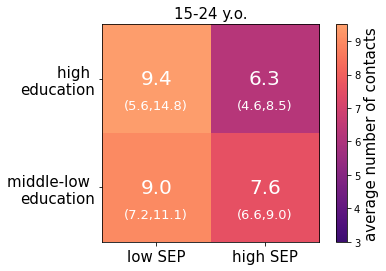

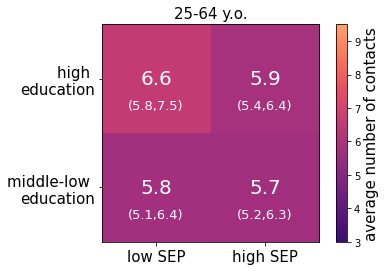

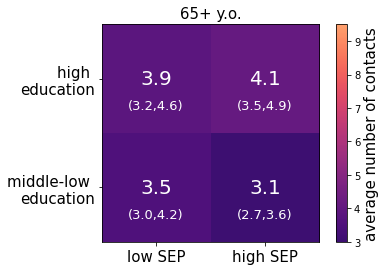

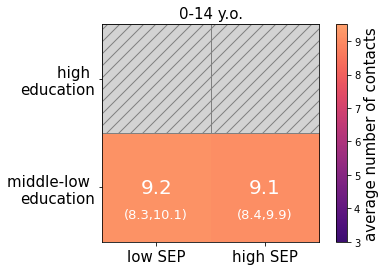

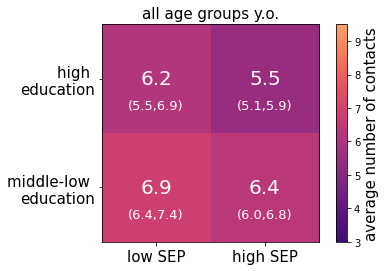

In [20]:
for h in range(len(comix['age_group_part'].unique())+1):
    
    for k in [6]:#range(len(comix['panel_wave'].unique())+1):

        if h < len(comix['age_group_part'].unique()):
            age_class = comix['age_group_part'].unique()[h]
            cc = comix[comix['age_group_part']==age_class].copy()
        else:
            age_class = 'all age groups'
            cc = comix.copy()
            
        if k < len(comix['panel_wave'].unique()):
            wave = cc['panel_wave'].unique()[k]
            dd = cc[cc['panel_wave']==wave].copy()
        else:
            wave = 'all waves'
            dd = cc.copy()            

        fig, ax_main = plt.subplots()

        df = dd[['education_level3','sep3_quartile','contacts_fill0_trunc50']].copy()

        # Define custom order for 'education_level3' and 'sep3_quartile'
        #education_order = ['Higher education (e.g., Bachelor, Master or PhD)',
        #                   'Gymnasium and advanced vocational education', 
        #                   'Obligatory school and vocational education']
        education_order = ['Tertiary level',
                           'Without tertiary education']
        quartile_order = ['lowest', 'highest']

        # Convert 'education_level3' and 'sep3_quartile' to categorical type with custom order
        df['education_level3'] = pd.Categorical(df['education_level3'], 
                                                categories=education_order, ordered=True)
        df['sep3_quartile'] = pd.Categorical(df['sep3_quartile'], 
                                             categories=quartile_order, ordered=True)

        # Group by 'education_level3' and 'sep3_quartile' columns and calculate mean
        df_grouped = df.groupby(["education_level3", "sep3_quartile"]).mean().reset_index()
        
        # compute CI
        
        # Group by 'education_level3' and 'sep3_quartile' and compute mean and confidence interval for each group
        result = df.groupby(['education_level3', 'sep3_quartile'])['contacts_fill0_trunc50'].apply(bootstrap_mean_ci).reset_index()
        
        # Extracting results into separate columns
        result[['mean', 'mean_bs', 'ci_low', 'ci_high']] = pd.DataFrame(result['contacts_fill0_trunc50'].apply(lambda x: 
                                                    x if isinstance(x,float)==False else 
                                                    (np.nan, np.nan, np.nan, np.nan)).tolist())
        # Dropping the original column
        result.drop(columns=['contacts_fill0_trunc50'], inplace=True)
        
        df_grouped['ci_dw'] = result['ci_low']
        df_grouped['ci_up'] = result['ci_high']

        value_min = 3 #df_grouped['contacts_fill0_trunc50'].min()
        value_max = 9.5 #df_grouped['contacts_fill0_trunc50'].max()

        # Pivot the DataFrame to prepare for heatmap
        heatmap_data = df_grouped.pivot(index='education_level3', 
                                        columns='sep3_quartile', 
                                        values='contacts_fill0_trunc50')
        
        # Pivot the DataFrame to prepare for heatmap
        heatmap_data_ci_up = df_grouped.pivot(index='education_level3', 
                                        columns='sep3_quartile', 
                                        values='ci_up')

        heatmap_data_ci_dw = df_grouped.pivot(index='education_level3', 
                                        columns='sep3_quartile', 
                                        values='ci_dw')

        cmap = plt.cm.magma
        cmap= truncate_colormap(cmap)
        
        # Plot heatmap using Matplotlib
        im = plt.imshow(heatmap_data, 
                   cmap=cmap,
                   interpolation='nearest', 
                   vmin=value_min, vmax=value_max)
        
        # Overlay dashed grid for NaN cells
        for i in range(heatmap_data.shape[0]):
            for j in range(heatmap_data.shape[1]):
                if np.isnan(heatmap_data.iloc[i, j]):
                    # Add a rectangle with a dashed edge
                    rect = Rectangle((j - 0.5, i - 0.5), 1, 1, edgecolor='gray', facecolor='lightgray', linestyle='-', hatch='//')
                    ax_main.add_patch(rect)

        # Add color bar
        plt.colorbar(im, orientation='vertical').set_label(label='average number of contacts',
                                                           size=15)#,weight='bold')

        # Set ticks
        plt.xticks(range(len(heatmap_data.columns)), 
                   ['low SEP', 'high SEP'], fontsize=15)
        plt.yticks(range(len(heatmap_data.index)), 
                   ['high \neducation', 'middle-low \neducation'], fontsize=15)

        # Set labels and title
        #plt.xlabel('SEP [33% ; 67%]\n(socio-economic position)')
        #plt.ylabel('Education level\n(socio-economic status)')
        plt.title("{} y.o.".format(age_class), fontsize=15)

        # Add annotations
        for i in range(len(heatmap_data.index)):
            for j in range(len(heatmap_data.columns)):
                if np.isnan(heatmap_data.iloc[i, j])==False:
                    plt.text(j, i, np.around(heatmap_data.values[i, j],1), 
                             ha='center', va='center', color='white', fontsize=20)
                    plt.text(j, i+0.25, '({},{})'.format(np.around(heatmap_data_ci_dw.values[i, j],1),
                                                np.around(heatmap_data_ci_up.values[i, j],1)), 
                     ha='center', va='center', color='white', fontsize=13)


        plt.savefig("./../output/figures/contact_activity_{}_{}_bootstrapped.png".format(age_class, wave), bbox_inches="tight")

        # Show plot
        plt.show()

## sample size

In [21]:
data_pop_grouped = pd.read_csv("./../data/pop_size_by_age_SEP_edu.csv", index_col=0)

dict_pop_full = dict(zip(data_pop_grouped[['age_group', 
                           'sep_level', 'edu_level']].apply(lambda x: 
                                               x[0]+", "+x[1]+", "+x[2], axis=1).values, 
                   100*data_pop_grouped['population']/sum(data_pop_grouped['population'])))

dict_pop_full

{'0-14, high SEP, high edu': 0.0,
 '0-14, low SEP, high edu': 0.0,
 '0-14, high SEP, low edu': 10.350263425896658,
 '0-14, low SEP, low edu': 4.698614665883721,
 '15-24, high SEP, high edu': 0.5891661295656055,
 '15-24, low SEP, high edu': 0.2822680235120633,
 '15-24, high SEP, low edu': 6.284093788079406,
 '15-24, low SEP, low edu': 3.010544313452938,
 '25-64, high SEP, high edu': 19.1868719326576,
 '25-64, low SEP, high edu': 6.103612686081605,
 '25-64, high SEP, low edu': 19.640576941158585,
 '25-64, low SEP, low edu': 10.674670176429773,
 '65+, high SEP, high edu': 3.970072019473281,
 '65+, low SEP, high edu': 1.2629355127695563,
 '65+, high SEP, low edu': 9.087578748243892,
 '65+, low SEP, low edu': 4.858731636795314}

In [22]:
sample_size = comix.groupby(['education_level3','sep3_quartile','age_group_part']).size().reset_index()

sample_size['education_level3'] = sample_size['education_level3'].apply(lambda x : 'high edu' 
                                                                        if x == 'Tertiary level' else
                                                                        'low edu')

sample_size['sep3_quartile'] = sample_size['sep3_quartile'].apply(lambda x : 'low SEP' 
                                                                        if x == 'lowest' else
                                                                        'high SEP')

In [23]:
dict_sample_full = dict(zip(sample_size[['age_group_part', 
                           'sep3_quartile', 
                           'education_level3']].apply(lambda x: 
                                               x[0]+", "+x[1]+", "+x[2], axis=1).values, 
                            100*sample_size[0]/sum(sample_size[0])))

dict_sample_full

{'15-24, high SEP, high edu': 1.232631107126849,
 '25-64, high SEP, high edu': 18.22052891080233,
 '65+, high SEP, high edu': 5.759748991483639,
 '15-24, low SEP, high edu': 0.6275212909009413,
 '25-64, low SEP, high edu': 7.171671896010758,
 '65+, low SEP, high edu': 2.2411474675033616,
 '0-14, high SEP, low edu': 10.600627521290901,
 '15-24, high SEP, low edu': 4.235768713581353,
 '25-64, high SEP, low edu': 17.503361721201255,
 '65+, high SEP, low edu': 6.768265351860152,
 '0-14, low SEP, low edu': 8.471537427162707,
 '15-24, low SEP, low edu': 2.1739130434782608,
 '25-64, low SEP, low edu': 11.721201255042581,
 '65+, low SEP, low edu': 3.2720753025549083}

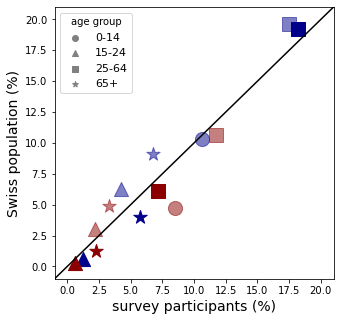

In [24]:
cols = dict(zip(["low SEP", "high SEP"], ["darkred", "darkblue"])) 


full_cols = {}
for k in dict_sample_full.keys():
    if "low SEP" in k:
        full_cols[k] = cols["low SEP"]
    else:
        full_cols[k] = cols["high SEP"]

plt.figure(figsize=(5,5))


plt.scatter([], [], label = '0-14', color="grey", marker = "o")
plt.scatter([], [], label = '15-24', color="grey", marker = "^")
plt.scatter([], [], label = '25-64', color="grey", marker = "s")
plt.scatter([], [], label = '65+', color="grey", marker = "*")

plt.legend(title = "age group", fontsize=11)

for k in dict_sample_full.keys():
    if '65+' in k:
        ss = 200
        marker = "*"
    elif '25-64' in k:
        ss = 150
        marker = "s"
    elif '15-24' in k:
        ss = 100
        marker = "^"
    else:
        ss = 50
        marker = "o"
    plt.scatter(dict_sample_full[k], dict_pop_full[k], s = 200, marker=marker,
               color=full_cols[k], alpha = 0.5 if "low edu" in k else 1.)
    
plt.xlabel("survey participants (%)", fontsize=14)
plt.ylabel("Swiss population (%)", fontsize=14)
    
plt.plot(np.arange(-2,22), np.arange(-2,22), color="black")

plt.xlim([-1,21])
plt.ylim([-1,21])

plt.savefig("./../output/figures/representativeness_sample.png", dpi=200, bbox_inches='tight')

plt.show()

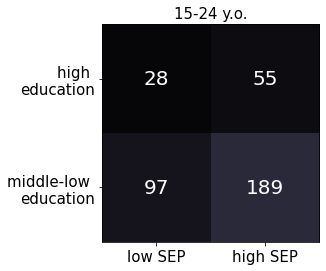

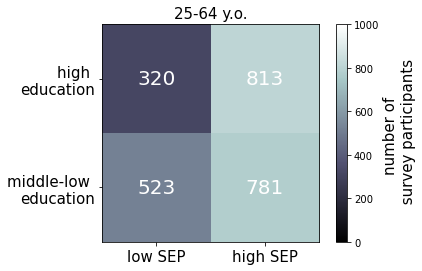

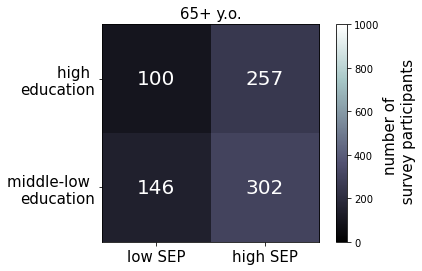

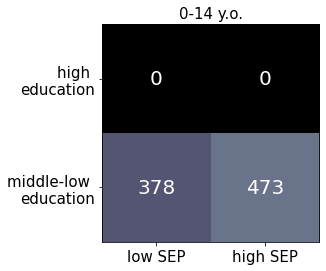

In [25]:
for h in range(len(comix['age_group_part'].unique())):
    
    #for k in range(len(comix['panel_wave'].unique())+1):

    if h < len(comix['age_group_part'].unique()):
        age_class = comix['age_group_part'].unique()[h]
        cc = comix[comix['age_group_part']==age_class].copy()
    else:
        age_class = 'all age groups'
        cc = comix.copy()

    #if k < len(comix['panel_wave'].unique()):
    #    wave = cc['panel_wave'].unique()[k]
    #    dd = cc[cc['panel_wave']==wave].copy()
    #else:
    wave = 'all waves'
    dd = cc.copy()            

    fig, ax_main = plt.subplots()

    df = dd[['education_level3','sep3_quartile','contacts_fill0_trunc50']].copy()

    # Define custom order for 'education_level3' and 'sep3_quartile'
    #education_order = ['Higher education (e.g., Bachelor, Master or PhD)',
    #                   'Gymnasium and advanced vocational education', 
    #                   'Obligatory school and vocational education']
    education_order = ['Tertiary level',
                       'Without tertiary education']
    quartile_order = ['lowest', 'highest']

    # Convert 'education_level3' and 'sep3_quartile' to categorical type with custom order
    df['education_level3'] = pd.Categorical(df['education_level3'], categories=education_order, ordered=True)
    df['sep3_quartile'] = pd.Categorical(df['sep3_quartile'], categories=quartile_order, ordered=True)

    # Group by 'education_level3' and 'sep3_quartile' columns and calculate mean
    df_grouped = df.groupby(["education_level3", "sep3_quartile"]).size().reset_index(name='size')

    value_min = 0 #df_grouped['size'].min()
    value_max = 1000 #df_grouped['size'].max()

    # Pivot the DataFrame to prepare for heatmap
    heatmap_data = df_grouped.pivot(index='education_level3', 
                                    columns='sep3_quartile', 
                                    values='size')

    # Plot heatmap using Matplotlib
    im = plt.imshow(heatmap_data, 
               cmap='bone',
               interpolation='nearest', 
               vmin=value_min, vmax=value_max)


    # Add color bar
    if h in [1,2]:
        plt.colorbar(im, orientation='vertical').set_label(label='number of \n survey participants',
                                                       size=15)#,weight='bold'

    # Set ticks
    plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
    plt.yticks(range(len(heatmap_data.index)), ['', ''])

    # Set ticks
    plt.xticks(range(len(heatmap_data.columns)), 
               ['low SEP', 'high SEP'], fontsize=15)
    plt.yticks(range(len(heatmap_data.index)), 
               ['high \neducation', 'middle-low \neducation'], fontsize=15)

    # Set labels and title
    #plt.xlabel('SEP [33% ; 67%]\n(socio-economic position)')
    #plt.ylabel('Education level\n(socio-economic status)')
    plt.title("{} y.o.".format(age_class), fontsize=15)

    # Add annotations
    for i in range(len(heatmap_data.index)):
        for j in range(len(heatmap_data.columns)):
            plt.text(j, i, np.around(heatmap_data.values[i, j],1), 
                     ha='center', va='center', color='white', fontsize=20)

    plt.savefig("./../output/figures/sample_sizes_{}_{}.png".format(age_class, wave), bbox_inches="tight")

    # Show plot
    plt.show()